In [1]:
import os
os.chdir('/home/jupyter-yehlin/DMSV2/dataset_final/ESMFold_dist')
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
import pandas as pd
import tqdm.notebook
import seaborn
import re, tempfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

## Data Processing

In [2]:
import pandas as pd
from scipy.stats import spearmanr
from itertools import combinations

def calculate_spearman_coefficient(merged_df, methods, score, exp_variable):
    # Get all combinations of 2 methods
    combinations_of_methods = list(combinations(methods, 2))

    # Create an empty DataFrame to store concatenated data
    combined_df = pd.DataFrame()

    # Concatenate all combinations into one DataFrame
    for i, (method1, method2) in enumerate(combinations_of_methods):
        # Filter DataFrame for the current combination of methods
        df_method1 = merged_df[merged_df['method'] == method1]
        df_method2 = merged_df[merged_df['method'] == method2]

        # Merge the DataFrames on 'ID' to get pairs of deltaG values for the same ID
        df_merged = pd.merge(df_method1, df_method2, on='ID', suffixes=(f'_{method1}', f'_{method2}'))

        # Rename columns to have consistent names
        df_merged.rename(columns={
            f'{exp_variable}_{method1}': exp_variable,
            f'{exp_variable}_{method2}': f'{exp_variable}_other',
            f'{score}_{method1}': score,
            f'{score}_{method2}': f'{score}_other',
            f'AF_plddt_{method1}': 'AF_plddt',
            f'AF_plddt_{method2}': 'AF_plddt_other',
        }, inplace=True)

        # Calculate the difference of PLDDT values
        df_merged['PLDDT_diff'] = df_merged['AF_plddt'] - df_merged['AF_plddt_other']

        # Concatenate into the combined DataFrame
        combined_df = pd.concat([combined_df, df_merged])
        
    
    # Calculate Spearman correlation coefficient
    spearman_coefficient, _ = spearmanr(
        combined_df[exp_variable] - combined_df[f'{exp_variable}_other'],
        combined_df[score] - combined_df[f'{score}_other'],
        nan_policy='omit'
    )
    

    return spearman_coefficient, combined_df

In [3]:
def calculate_spearman_coefficients(merged_df, methods, columns, exp_variable):
    spearman_coefficients = []
    for column in columns:
        result, output_df= calculate_spearman_coefficient(merged_df, methods, column, exp_variable)
        spearman_coefficients.append(result)
    return spearman_coefficients

methods = ['TrROS', 'TrMRF', 'TrROS_Hall', 'JUSTAS']
columns_to_calculate = [
    'Full Seq PLDDT',
    'Half Masked ESMFold Average Plddt',
    'Max Half Masked ESMFold Plddt',
    'ESM Score',
    'AF_plddt',
    'inter_pae',
    'unconditional_CE',
    'conditional_CE',
    'Hybrid Composite Score',
    'log_CE_full',
    'CE_full',
]

def calculate_average(lst):
    return sum(lst) / len(lst)

In [4]:
merged_df= pd.read_csv('all_4_AF_plddt70_inter_pae_015_final_dataset.csv')

In [5]:
import ast
merged_df['log_CE_mask'] = merged_df['log_CE_mask'].apply(ast.literal_eval)
merged_df['CE_mask'] = merged_df['CE_mask'].apply(ast.literal_eval)
merged_df['PLDDT_mask'] = merged_df['PLDDT_mask'].apply(ast.literal_eval)

## ESMFold Distogram CE

Spearman Correlation Coefficient for Method JUSTAS: 0.20224210194112155
Spearman Correlation Coefficient for Method TrMRF: 0.42162202732786147
Spearman Correlation Coefficient for Method TrROS_Hall: 0.27385028803495454
Spearman Correlation Coefficient for Method TrROS: 0.5520090728601467


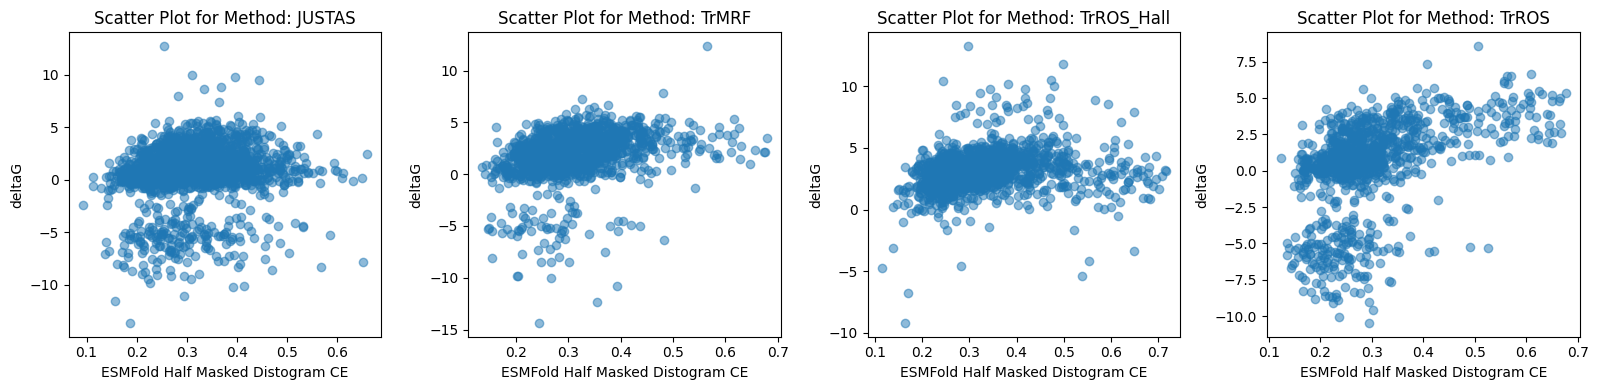

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Create a unique numerical code for each unique 'method' value
method_codes, method_labels = pd.factorize(merged_df['method'])

# Get unique methods
unique_methods = merged_df['method'].unique()

# Create a figure with four subplots in a single row
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Iterate through unique methods and create scatter plots
for i, method in enumerate(unique_methods):
    ax = axes[i]
    subset_df = merged_df[merged_df['method'] == method]
    
    x = np.mean(subset_df['CE_mask'].tolist(), axis=-1)
    y = subset_df['deltaG'].tolist()
    
    # Create a scatter plot for each method
    ax.scatter(x, y, alpha=0.5, label=method)
    ax.set_xlabel('ESMFold Half Masked Distogram CE')
    ax.set_ylabel('deltaG')
    ax.set_title(f'Scatter Plot for Method: {method}')
    
    # Calculate Spearman rank correlation coefficient for each method
    correlation_coefficient, p_value = stats.spearmanr(x, y)
    print(f"Spearman Correlation Coefficient for Method {method}: {correlation_coefficient}")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Spearman Correlation Coefficient for Method JUSTAS: 0.17253982410702717
Spearman Correlation Coefficient for Method TrMRF: 0.43761107724979853
Spearman Correlation Coefficient for Method TrROS_Hall: 0.2809271761761619
Spearman Correlation Coefficient for Method TrROS: 0.5583365251241528


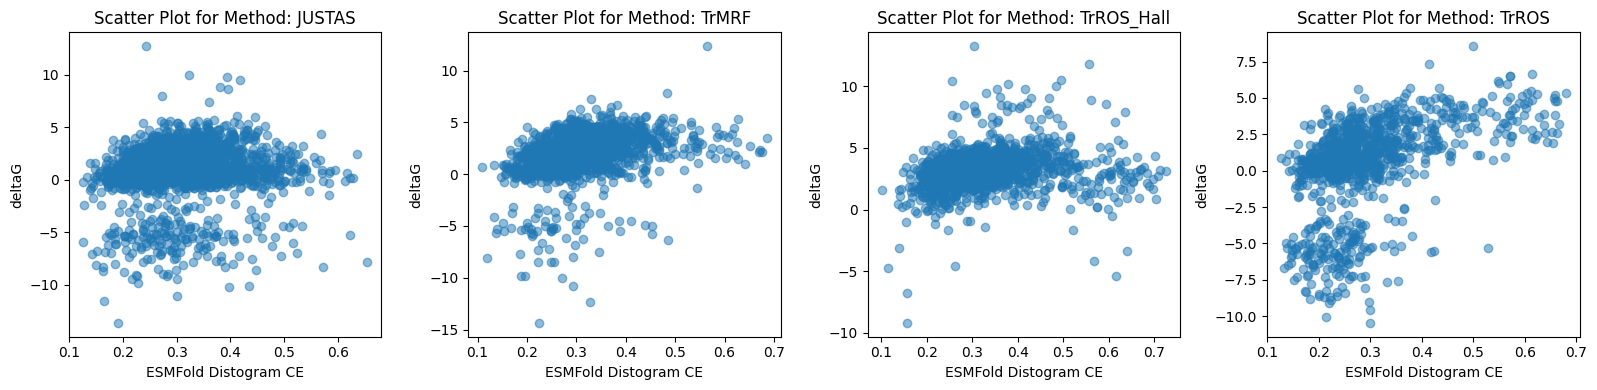

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Create a unique numerical code for each unique 'method' value
method_codes, method_labels = pd.factorize(merged_df['method'])

# Get unique methods
unique_methods = merged_df['method'].unique()

# Create a figure with four subplots in a single row
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Iterate through unique methods and create scatter plots
for i, method in enumerate(unique_methods):
    ax = axes[i]
    subset_df = merged_df[merged_df['method'] == method]
    
    x = subset_df['CE_full'].tolist()
    y = subset_df['deltaG'].tolist()
    
    # Create a scatter plot for each method
    ax.scatter(x, y, alpha=0.5, label=method)
    ax.set_xlabel('ESMFold Distogram CE')
    ax.set_ylabel('deltaG')
    ax.set_title(f'Scatter Plot for Method: {method}')
    
    # Calculate Spearman rank correlation coefficient for each method
    correlation_coefficient, p_value = stats.spearmanr(x, y)
    print(f"Spearman Correlation Coefficient for Method {method}: {correlation_coefficient}")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Spearman Correlation Coefficient for Method JUSTAS: 0.28811292153030593
Spearman Correlation Coefficient for Method TrMRF: 0.4005250125509702
Spearman Correlation Coefficient for Method TrROS_Hall: 0.42039069333253953
Spearman Correlation Coefficient for Method TrROS: 0.43145430706948745


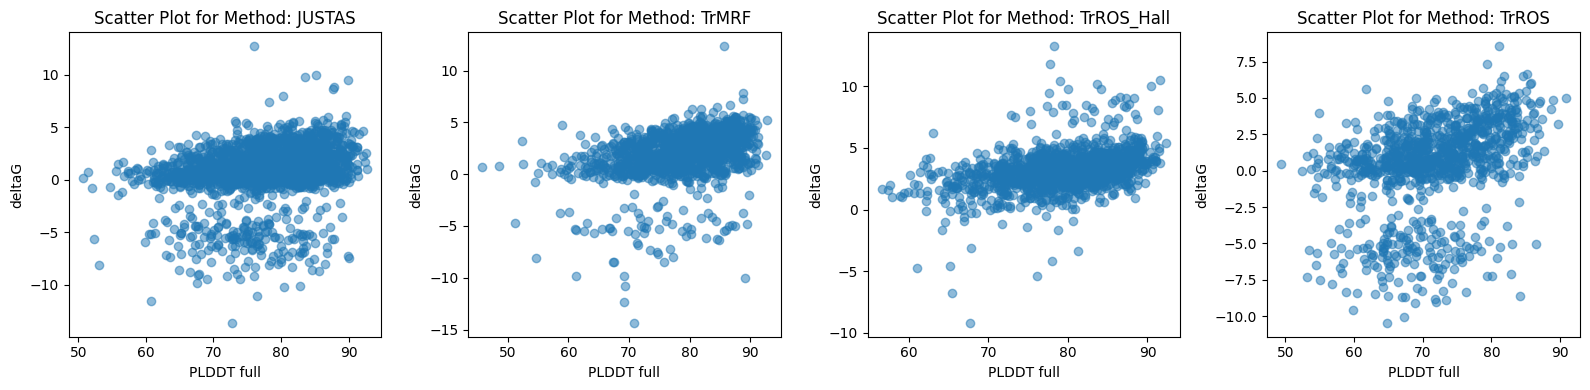

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Create a unique numerical code for each unique 'method' value
method_codes, method_labels = pd.factorize(merged_df['method'])

# Get unique methods
unique_methods = merged_df['method'].unique()

# Create a figure with four subplots in a single row
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Iterate through unique methods and create scatter plots
for i, method in enumerate(unique_methods):
    ax = axes[i]
    subset_df = merged_df[merged_df['method'] == method]
    
    x = subset_df['PLDDT_full'].tolist()
    y = subset_df['deltaG'].tolist()
    
    # Create a scatter plot for each method
    ax.scatter(x, y, alpha=0.5, label=method)
    ax.set_xlabel('PLDDT full')
    ax.set_ylabel('deltaG')
    ax.set_title(f'Scatter Plot for Method: {method}')
    
    # Calculate Spearman rank correlation coefficient for each method
    correlation_coefficient, p_value = stats.spearmanr(x, y)
    print(f"Spearman Correlation Coefficient for Method {method}: {correlation_coefficient}")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Spearman Correlation Coefficient for Method JUSTAS: -0.19394329134839036
Spearman Correlation Coefficient for Method TrMRF: -0.4079314283203793
Spearman Correlation Coefficient for Method TrROS_Hall: -0.2848606317906328
Spearman Correlation Coefficient for Method TrROS: -0.5314831800611716


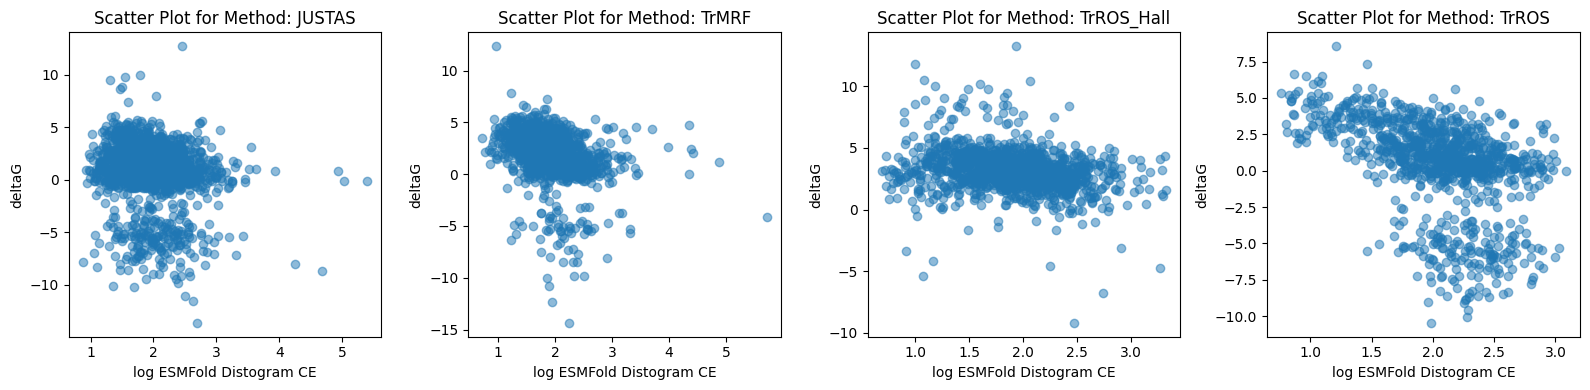

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Create a unique numerical code for each unique 'method' value
method_codes, method_labels = pd.factorize(merged_df['method'])

# Get unique methods
unique_methods = merged_df['method'].unique()

# Create a figure with four subplots in a single row
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Iterate through unique methods and create scatter plots
for i, method in enumerate(unique_methods):
    ax = axes[i]
    subset_df = merged_df[merged_df['method'] == method]
    
    x =subset_df['log_CE_full'].tolist()
    y = subset_df['deltaG'].tolist()
    
    # Create a scatter plot for each method
    ax.scatter(x, y, alpha=0.5, label=method)
    ax.set_xlabel('log ESMFold Distogram CE')
    ax.set_ylabel('deltaG')
    ax.set_title(f'Scatter Plot for Method: {method}')
    
    # Calculate Spearman rank correlation coefficient for each method
    correlation_coefficient, p_value = stats.spearmanr(x, y)
    print(f"Spearman Correlation Coefficient for Method {method}: {correlation_coefficient}")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## ESMFold pLDDT

Spearman Correlation Coefficient for Method JUSTAS: 0.5009834809806384
Spearman Correlation Coefficient for Method TrMRF: 0.5598715355427509
Spearman Correlation Coefficient for Method TrROS_Hall: 0.5834925247614269
Spearman Correlation Coefficient for Method TrROS: 0.5958317285184311


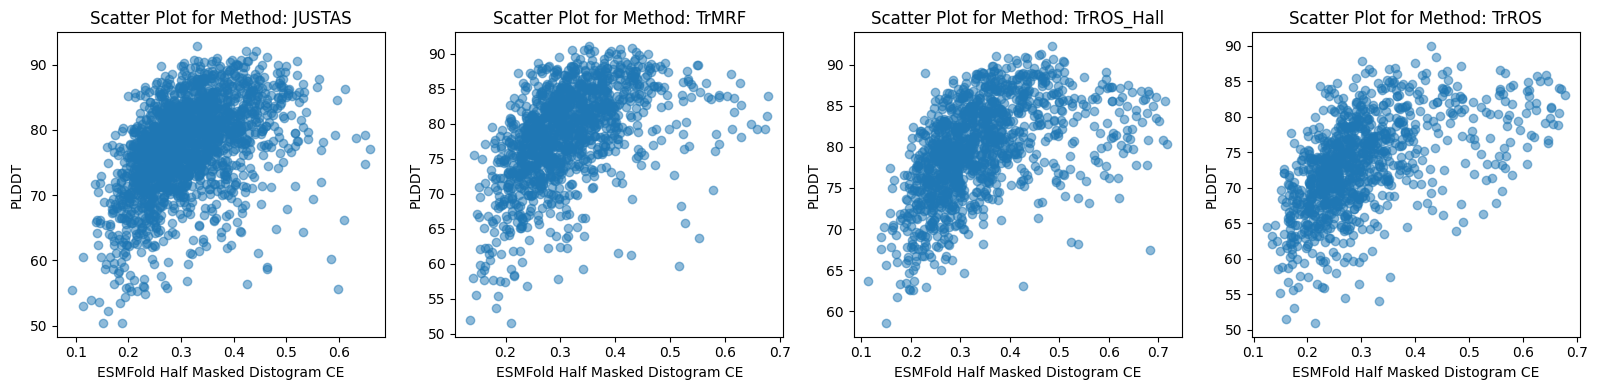

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Create a unique numerical code for each unique 'method' value
method_codes, method_labels = pd.factorize(merged_df['method'])

# Get unique methods
unique_methods = merged_df['method'].unique()

# Create a figure with four subplots in a single row
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Iterate through unique methods and create scatter plots
for i, method in enumerate(unique_methods):
    ax = axes[i]
    subset_df = merged_df[merged_df['method'] == method]
    
    x = np.mean(subset_df['CE_mask'].tolist(), axis=-1)
    y = np.mean(subset_df['PLDDT_mask'].tolist(), axis=-1)
    # Create a scatter plot for each method
    ax.scatter(x, y, alpha=0.5, label=method)
    ax.set_xlabel('ESMFold Half Masked Distogram CE')
    ax.set_ylabel('PLDDT')
    ax.set_title(f'Scatter Plot for Method: {method}')
    
    # Calculate Spearman rank correlation coefficient for each method
    correlation_coefficient, p_value = stats.spearmanr(x, y)
    print(f"Spearman Correlation Coefficient for Method {method}: {correlation_coefficient}")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Spearman Correlation Coefficient for Method JUSTAS: -0.6507579861705356
Spearman Correlation Coefficient for Method TrMRF: -0.6771677273694325
Spearman Correlation Coefficient for Method TrROS_Hall: -0.6511805911726346
Spearman Correlation Coefficient for Method TrROS: -0.7077560053099284


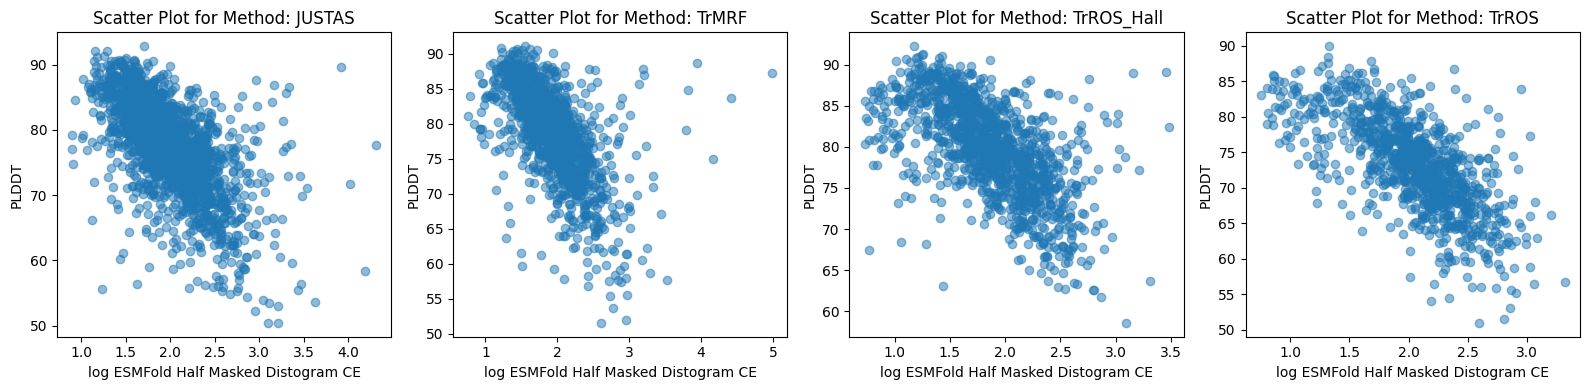

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Create a unique numerical code for each unique 'method' value
method_codes, method_labels = pd.factorize(merged_df['method'])

# Get unique methods
unique_methods = merged_df['method'].unique()

# Create a figure with four subplots in a single row
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Iterate through unique methods and create scatter plots
for i, method in enumerate(unique_methods):
    ax = axes[i]
    subset_df = merged_df[merged_df['method'] == method]
    
    x = np.mean(subset_df['log_CE_mask'].tolist(), axis=-1)
    y = np.mean(subset_df['PLDDT_mask'].tolist(), axis=-1)
    
    # Create a scatter plot for each method
    ax.scatter(x, y, alpha=0.5, label=method)
    ax.set_xlabel('log ESMFold Half Masked Distogram CE')
    ax.set_ylabel('PLDDT')
    ax.set_title(f'Scatter Plot for Method: {method}')
    
    # Calculate Spearman rank correlation coefficient for each method
    correlation_coefficient, p_value = stats.spearmanr(x, y)
    print(f"Spearman Correlation Coefficient for Method {method}: {correlation_coefficient}")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Spearman Correlation Coefficient for Method JUSTAS: 0.5470422453880788
Spearman Correlation Coefficient for Method TrMRF: 0.5892589125086941
Spearman Correlation Coefficient for Method TrROS_Hall: 0.6057741616385615
Spearman Correlation Coefficient for Method TrROS: 0.6370759016221369


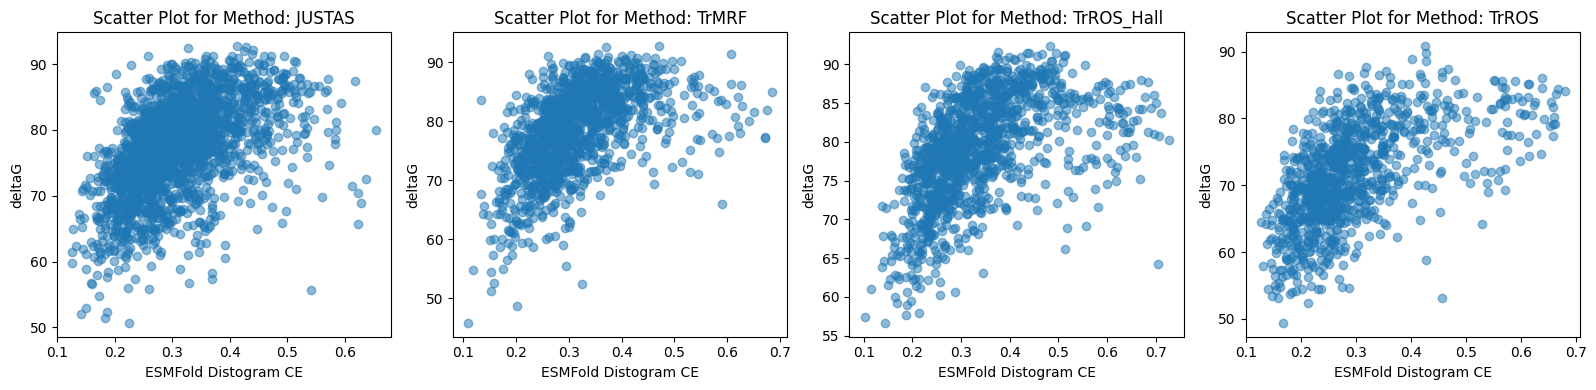

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Create a unique numerical code for each unique 'method' value
method_codes, method_labels = pd.factorize(merged_df['method'])

# Get unique methods
unique_methods = merged_df['method'].unique()

# Create a figure with four subplots in a single row
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Iterate through unique methods and create scatter plots
for i, method in enumerate(unique_methods):
    ax = axes[i]
    subset_df = merged_df[merged_df['method'] == method]
    
    x = subset_df['CE_full'].tolist()
    y = subset_df['PLDDT_full'].tolist()
    
    # Create a scatter plot for each method
    ax.scatter(x, y, alpha=0.5, label=method)
    ax.set_xlabel('ESMFold Distogram CE')
    ax.set_ylabel('deltaG')
    ax.set_title(f'Scatter Plot for Method: {method}')
    
    # Calculate Spearman rank correlation coefficient for each method
    correlation_coefficient, p_value = stats.spearmanr(x, y)
    print(f"Spearman Correlation Coefficient for Method {method}: {correlation_coefficient}")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Spearman Correlation Coefficient for Method JUSTAS: -0.6168674340816507
Spearman Correlation Coefficient for Method TrMRF: -0.6427250386975729
Spearman Correlation Coefficient for Method TrROS_Hall: -0.6295110942659681
Spearman Correlation Coefficient for Method TrROS: -0.7269721003746876


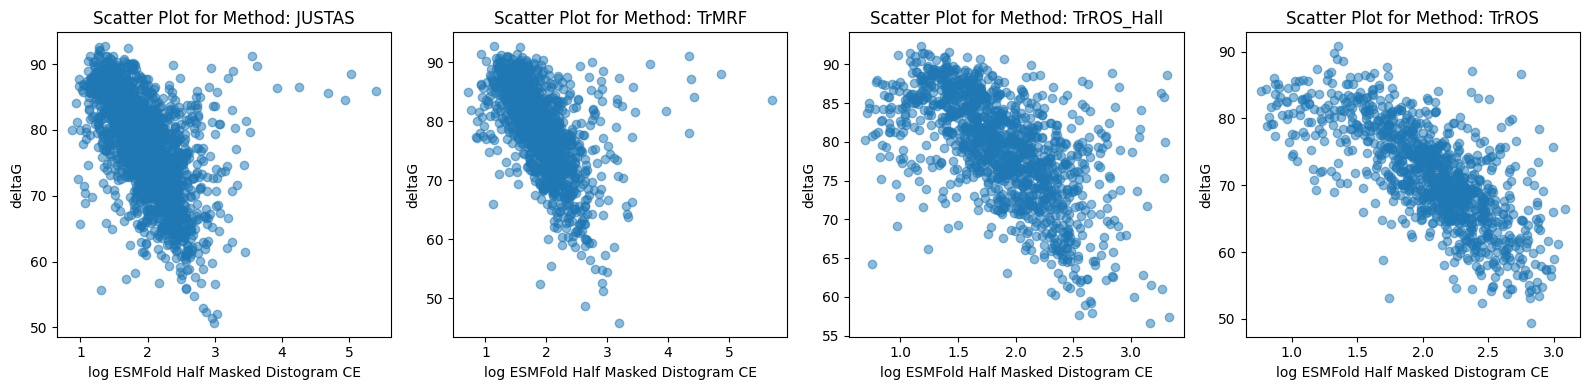

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats


method_codes, method_labels = pd.factorize(merged_df['method'])
unique_methods = merged_df['method'].unique()
fig, axes = plt.subplots(1, 4, figsize=(16, 4))


for i, method in enumerate(unique_methods):
    ax = axes[i]
    subset_df = merged_df[merged_df['method'] == method]
    
    x =subset_df['log_CE_full'].tolist()
    y = subset_df['PLDDT_full'].tolist()

    ax.scatter(x, y, alpha=0.5, label=method)
    ax.set_xlabel('log ESMFold Half Masked Distogram CE')
    ax.set_ylabel('deltaG')
    ax.set_title(f'Scatter Plot for Method: {method}')

    correlation_coefficient, p_value = stats.spearmanr(x, y)
    print(f"Spearman Correlation Coefficient for Method {method}: {correlation_coefficient}")

plt.tight_layout()
plt.show()


## dG

In [14]:
merged_df['log ESM Score'] = -np.log(merged_df['ESM Score'])

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split

def get_correlation(df, x_column, y_column):
    df_no_nan = df[[x_column, y_column]].dropna()
    pearson_coefficient, _ = pearsonr(df_no_nan[x_column], df_no_nan[y_column])
    spearman_coefficient, _ = spearmanr(df_no_nan[x_column], df_no_nan[y_column])
    return pearson_coefficient, spearman_coefficient

def Hybrid_score_ratio_scanning(ylabel, ratio, df):
    df['Hybrid Composite Score 1'] = -ratio * df['conditional_CE'] + (1 - ratio) * df['Half Masked ESMFold Average Plddt']
    df['Hybrid Composite Score 2'] = -ratio * df['conditional_CE'] + (1 - ratio) * df['CE_avg_mask']
    df['Hybrid Composite Score 3'] = ratio * df['log ESM Score'] + (1 - ratio) * df['Half Masked ESMFold Average Plddt']
    df['Hybrid Composite Score 4'] = ratio * df['dg_IF'] + (1 - ratio) * df['Half Masked ESMFold Average Plddt']

    p1, s1 = get_correlation(df, 'Hybrid Composite Score 1', ylabel)
    p2, s2 = get_correlation(df, 'Hybrid Composite Score 2', ylabel)
    p3, s3 = get_correlation(df, 'Hybrid Composite Score 3', ylabel)
    p4, s4 = get_correlation(df, 'Hybrid Composite Score 4', ylabel)
    
    return [p1, s1, p2, s2, p3, s3, p4, s4], df


train, test = train_test_split(merged_df, test_size=0.8, random_state=42)

ratio = np.linspace(0, 1, 161)
correlation_ls = []

for numb in ratio:
    score, _ = Hybrid_score_ratio_scanning('deltaG', numb, train) 
    correlation_ls.append(score)

correlation_ls = np.array(correlation_ls)


max_ratio1_index = np.argmax(correlation_ls[:, 1])
max_ratio2_index = np.argmax(np.abs(correlation_ls[:, 3]))
max_ratio3_index = np.argmax(np.abs(correlation_ls[:, 5]))
max_ratio4_index = np.argmax(np.abs(correlation_ls[:, 7]))

max_ratio1 = ratio[max_ratio1_index]
max_ratio2 = ratio[max_ratio2_index]
max_ratio3 = ratio[max_ratio3_index]
max_ratio4 = ratio[max_ratio4_index]

print("For the first hybrid score:")
print("Maximum Spearman correlation:", correlation_ls[max_ratio1_index, 1])
print("Corresponding ratio:", max_ratio1)

print("\nFor the second hybrid score:")
print("Maximum Spearman correlation:", np.abs(correlation_ls[max_ratio2_index, 3]))
print("Corresponding ratio:", max_ratio2)

print("\nFor the third hybrid score:")
print("Maximum Spearman correlation:", np.abs(correlation_ls[max_ratio3_index, 5]))
print("Corresponding ratio:", max_ratio3)

print("\nFor the fourth hybrid score:")
print("Maximum Spearman correlation:", np.abs(correlation_ls[max_ratio4_index, 7]))
print("Corresponding ratio:", max_ratio4)

# Step 4: Apply the best ratios to the entire test set and calculate Spearman correlation
test['Hybrid Composite Score 1'] = -max_ratio1 * test['conditional_CE'] + (1 - max_ratio1) * test['Half Masked ESMFold Average Plddt']
test['Hybrid Composite Score 2'] = -max_ratio2 * test['conditional_CE'] + (1 - max_ratio2) * test['CE_avg_mask']
test['Hybrid Composite Score 3'] = max_ratio3 * test['log ESM Score'] + (1 - max_ratio3) * test['Half Masked ESMFold Average Plddt']
test['Hybrid Composite Score 4'] = max_ratio4 * test['dg_IF'] + (1 - max_ratio4) * test['Half Masked ESMFold Average Plddt']

# Calculate Spearman correlation for each hybrid score
spearman_scores = [
    spearmanr(test['deltaG'], test['Hybrid Composite Score 1']),
    spearmanr(test['deltaG'], test['Hybrid Composite Score 2']),
    spearmanr(test['deltaG'], test['Hybrid Composite Score 3']),
    spearmanr(test['deltaG'], test['Hybrid Composite Score 4']),
]

# Step 5: Print the Spearman correlation results for the test set
for idx, (corr, p_value) in enumerate(spearman_scores):
    print(f"\nHybrid Composite Score {idx + 1}: Correlation = {corr}, p-value = {p_value}")

For the first hybrid score:
Maximum Spearman correlation: 0.49856373473367854
Corresponding ratio: 0.9500000000000001

For the second hybrid score:
Maximum Spearman correlation: 0.4647519758130702
Corresponding ratio: 0.25

For the third hybrid score:
Maximum Spearman correlation: 0.5456265739458169
Corresponding ratio: 0.9187500000000001

For the fourth hybrid score:
Maximum Spearman correlation: 0.4633650143107048
Corresponding ratio: 0.00625

Hybrid Composite Score 1: Correlation = 0.5088932644648616, p-value = 2.1415785933887625e-285

Hybrid Composite Score 2: Correlation = 0.46642799817998987, p-value = 5.355682818084652e-234

Hybrid Composite Score 3: Correlation = 0.551559442077618, p-value = 0.0

Hybrid Composite Score 4: Correlation = 0.4820663130354496, p-value = 4.366340081734399e-252


In [29]:
test.keys()

Index(['name', 'sequence', 'Full Seq PLDDT', 'Half Masked ESMFold Plddt',
       'Max Half Masked ESMFold Plddt', 'Half Masked ESMFold Average Plddt',
       'ESM Score', 'AF_plddt', 'inter_pae', 'log10_K50_t', 'log10_K50_t_95CI',
       'log10_K50_c', 'log10_K50_c_95CI', 'deltaG_t', 'deltaG_t_95CI',
       'deltaG_c', 'deltaG_c_95CI', 'deltaG', 'deltaG_95CI',
       'unconditional_CE', 'unconditional_softmax_CE', 'conditional_CE',
       'conditional_softmax_CE', 'Hybrid Composite Score', 'log_CE_mask',
       'CE_mask', 'PLDDT_mask', 'PTM_mask', 'log_CE_full', 'CE_full',
       'PLDDT_full', 'PTM_full', 'dg_IF', 'dg_kcalmol', 'ID', 'method',
       'log_CE_avg_mask', 'CE_avg_mask', 'log ESM Score',
       'Hybrid Composite Score 1', 'Hybrid Composite Score 2',
       'Hybrid Composite Score 3', 'Hybrid Composite Score 4'],
      dtype='object')

In [17]:
# merged_df.to_csv('all_4_AF_plddt70_inter_pae_015_final_dataset_hybrid_score_final_1008_4splits.csv', index=False)

In [18]:
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

def scatter_and_correlation(ax, df, x_column, y_column, label_x, label_y, xlim=None, ylim=None):

    df_no_nan = df[[x_column, y_column]].dropna()

    ax.scatter(df_no_nan[x_column].tolist(), df_no_nan[y_column].tolist(), color='black')
    ax.set_title(f'{label_x} vs {label_y}')
    ax.set_xlabel(label_x)
    ax.set_ylabel(label_y)


    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)


    pearson_coefficient, _ = pearsonr(df_no_nan[x_column], df_no_nan[y_column])
    spearman_coefficient, _ = spearmanr(df_no_nan[x_column], df_no_nan[y_column])

    ax.text(0.5, 0.95, f"Pearson Coeff: {pearson_coefficient:.2f}", transform=ax.transAxes,
            horizontalalignment='center', verticalalignment='top', fontsize=10)
    ax.text(0.5, 0.90, f"Spearman Coeff: {spearman_coefficient:.2f}", transform=ax.transAxes,
            horizontalalignment='center', verticalalignment='top', fontsize=10)

    return pearson_coefficient, spearman_coefficient


def plot_experiment_vs_computation(ylabel ='log10_K50_t'):
    
    fig, axs = plt.subplots(2, 8, figsize=(20, 6), dpi=200)
    axs = axs.flatten()

    p1,s1=scatter_and_correlation(axs[0], test, 'Full Seq PLDDT', ylabel, 'Full Seq pLDDT', ylabel, xlim=(20, 100), ylim=(-4, 6))
    p2,s2=scatter_and_correlation(axs[1], test, 'Half Masked ESMFold Average Plddt', ylabel, 'Half Masked ESMFold Average pLDDT', ylabel, xlim=(20, 100),   ylim=(-4, 6))
    p3,s3=scatter_and_correlation(axs[2], test, 'Max Half Masked ESMFold Plddt', ylabel, 'Max Half Masked ESMFold pLDDT', ylabel, xlim=(20, 100),   ylim=(-4, 6))
    p4,s4=scatter_and_correlation(axs[3], test, 'log ESM Score', ylabel, 'log ESM Score', ylabel, xlim=(0, 20),  ylim=(-4, 6))
    p5,s5=scatter_and_correlation(axs[4], test, 'AF_plddt', ylabel, 'AF-Plddt', ylabel, xlim=(35, 100), ylim=(-4, 6))
    p6,s6=scatter_and_correlation(axs[5], test, 'inter_pae',ylabel, 'Inter-PAEe', ylabel, xlim=(15, 40),  ylim=(-4, 6))
    p7,s7=scatter_and_correlation(axs[6], test, 'unconditional_CE', ylabel, 'Unconditional \n ProteinMPNN CE', ylabel, xlim=(1, 2.5), ylim=(-4, 6))
    p8,s8=scatter_and_correlation(axs[7], test, 'conditional_CE', ylabel, 'Conditional \n ProteinMPNN CE', ylabel, xlim=(1, 2.5),  ylim=(-4, 6))
    p9,s9=scatter_and_correlation(axs[8], test, 'Hybrid Composite Score 1', ylabel, 'Hybrid Composite Score', ylabel, xlim=(-5, 0),  ylim=(-4, 6))
    p10,s10=scatter_and_correlation(axs[9], test, 'log_CE_full', ylabel, 'log ESMFold Distogram CE', ylabel, xlim=(0, 10),  ylim=(-4, 6))
    p11,s11=scatter_and_correlation(axs[10], test, 'CE_full', ylabel, 'ESMFold Distogram CE', ylabel, xlim=(0, 1),  ylim=(-4, 6))
    p12,s12=scatter_and_correlation(axs[11], test, 'Hybrid Composite Score 2', ylabel, 'Hybrid Composite Score 2', ylabel,  xlim=(-0.25, 0.5),  ylim=(-4, 6))
    p13,s13=scatter_and_correlation(axs[12], test, 'log_CE_avg_mask', ylabel, 'log Half Masked ESMFold Distogram CE', ylabel, xlim=(0, 10),  ylim=(-4, 6))
    p14,s14=scatter_and_correlation(axs[13], test, 'CE_avg_mask', ylabel, 'Half Masked ESMFold Distogram CE', ylabel, xlim=(0, 1),  ylim=(-4, 6))
    p15,s15=scatter_and_correlation(axs[14], test, 'Hybrid Composite Score 3', ylabel, 'Hybrid Composite Score 3', ylabel,  xlim=(-0.25, 0.5),  ylim=(-4, 6))
    p16,s16=scatter_and_correlation(axs[15], test, 'dg_IF', ylabel, 'ESM-IF Summed Likelihoods', ylabel, xlim=(4, 50),  ylim=(-4, 6))


    K_t_p = [p1, p2,p3,p4,p5,p6,p7,p8,p9, p10, p11, p12, p13,p14,p15, p16]
    K_t_s = [s1, s2,s3,s4,s5,s6,s7,s8,s9, s10, s11, s12,s13,s14,s15, s16]


    plt.tight_layout()
    plt.show()
    
    return K_t_p, K_t_s

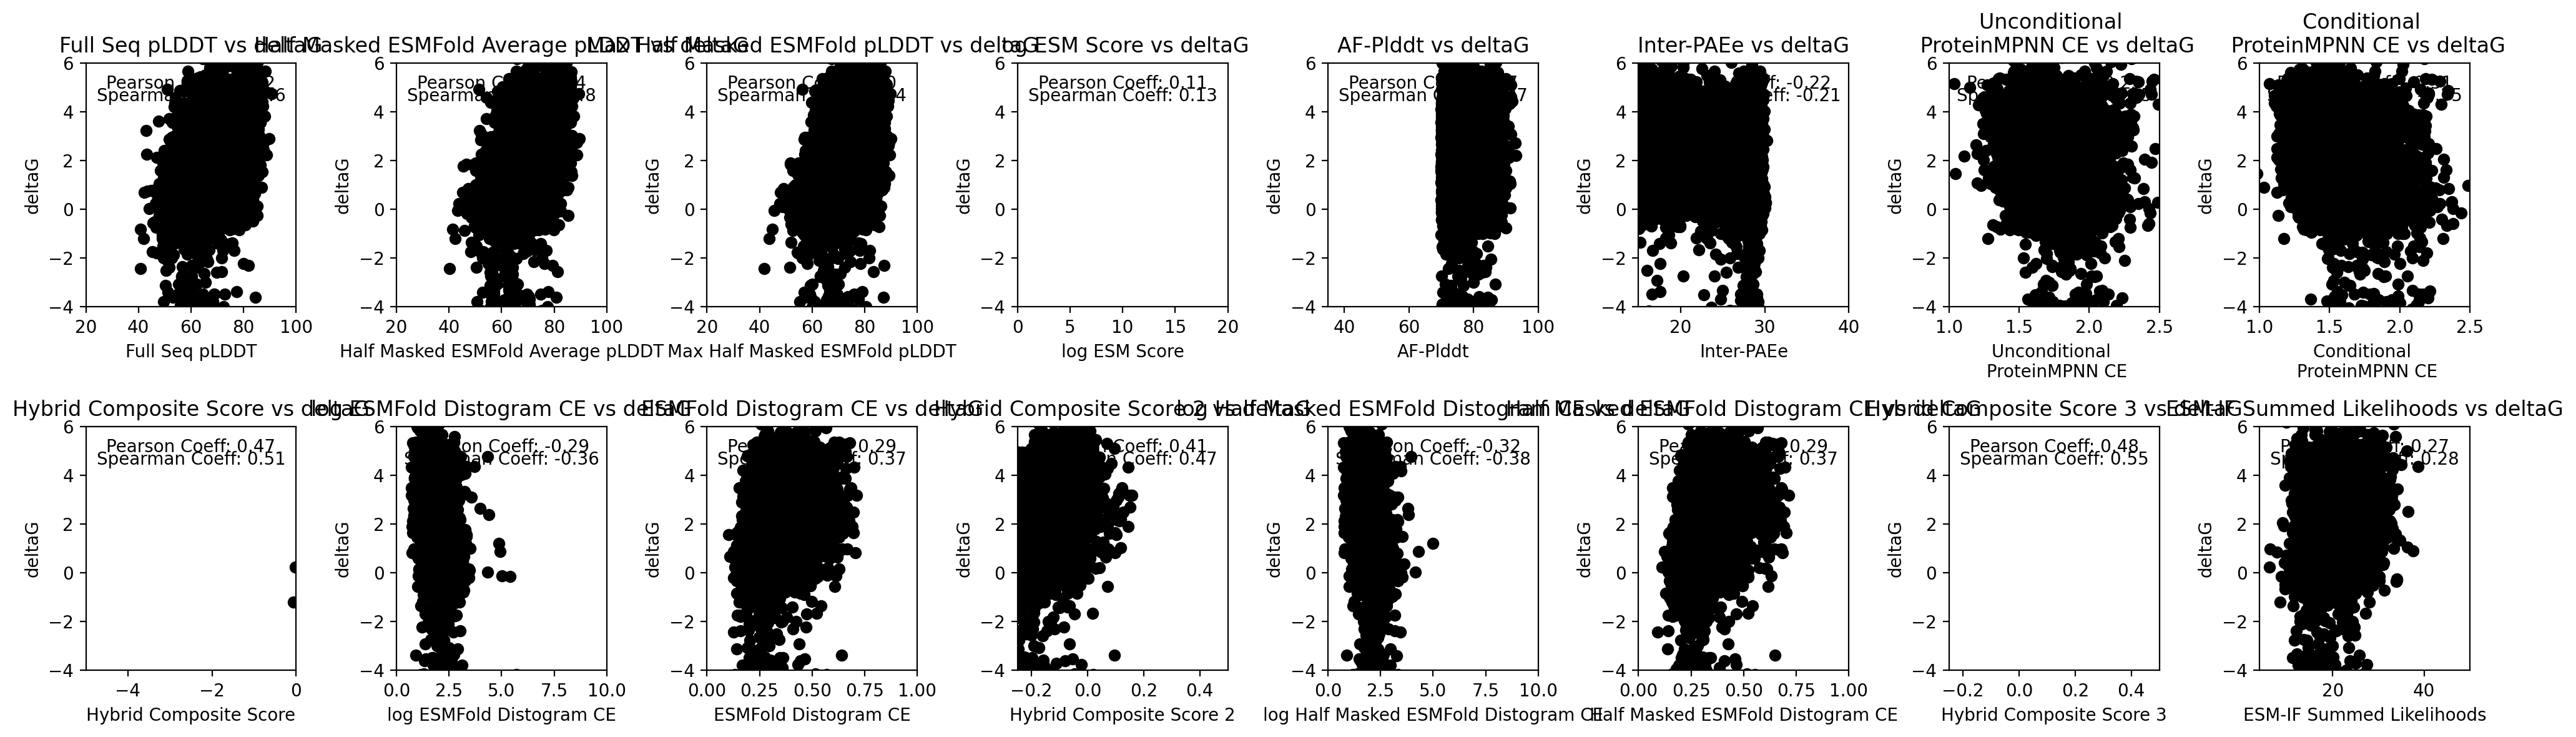

In [19]:
G_p, G_s= plot_experiment_vs_computation(ylabel ='deltaG')

In [20]:
import numpy as np
import matplotlib.pyplot as plt

num_groups = 1
bar_width = 0.02
index = np.arange(num_groups)


data_p = [G_p]
data_s = [G_s]

    
data_p = np.abs(np.array(data_p))
data_s = np.abs(np.array(data_s))

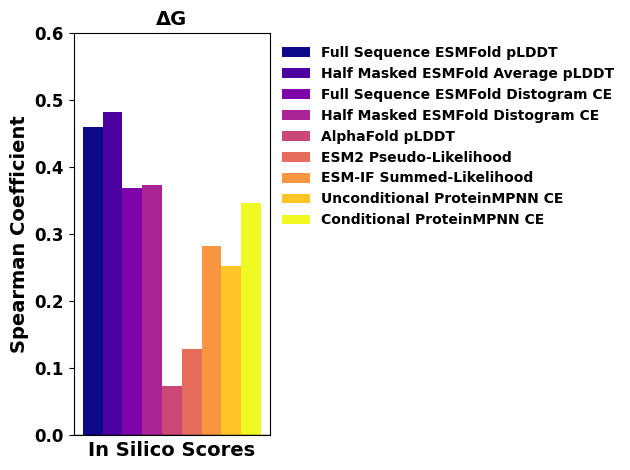

In [21]:
import matplotlib.pyplot as plt
import numpy as np


colors = plt.cm.plasma(np.linspace(0, 1, 9))


plt.bar(index - 5 * bar_width, data_s[:, 0], bar_width, label='Full Sequence ESMFold pLDDT', color=colors[0])
plt.bar(index - 4 * bar_width, data_s[:, 1], bar_width, label='Half Masked ESMFold Average pLDDT', color=colors[1])
plt.bar(index - 3 * bar_width, data_s[:, 10], bar_width, label='Full Sequence ESMFold Distogram CE', color=colors[2])
plt.bar(index - 2 * bar_width, data_s[:, 13], bar_width, label='Half Masked ESMFold Distogram CE', color=colors[3])
plt.bar(index - 1 * bar_width, data_s[:, 4], bar_width, label='AlphaFold pLDDT', color=colors[4])
plt.bar(index, data_s[:, 3], bar_width, label='ESM2 Pseudo-Likelihood', color=colors[5])
plt.bar(index + 1 * bar_width, data_s[:, 15], bar_width, label='ESM-IF Summed-Likelihood', color=colors[6])
plt.bar(index + 2 * bar_width, data_s[:, 6], bar_width, label='Unconditional ProteinMPNN CE', color=colors[7])
plt.bar(index + 3 * bar_width, data_s[:, 7], bar_width, label='Conditional ProteinMPNN CE', color=colors[8])


plt.axhline(y=0, color='black', linestyle='-', linewidth=1)


plt.title('ΔG', fontsize=14, weight='bold')
plt.xlabel('In Silico Scores', fontsize=14, weight='bold')
plt.ylabel('Spearman Coefficient', fontsize=14, weight='bold')
plt.ylim([0, 0.6])  # Set y-axis from 0 to 0.6
# plt.xticks(index, fontsize=12, weight='bold')
plt.xticks([])
plt.yticks(fontsize=12, weight='bold')
plt.yticks(np.arange(0, 0.65, 0.1), fontsize=12, weight='bold')  # Adjust the step as needed

legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, frameon=False)
for text in legend.get_texts():
    text.set_weight('bold')  

plt.tight_layout(rect=[0, 0, 1, 1]) 
# plt.savefig('/home/jupyter-yehlin/DMSV2/final_paper_figures/models_spearman_coefficient_viridis_logESM.png', dpi=300)

plt.show()

## ddG

In [22]:
import pandas as pd
from scipy.stats import spearmanr
from itertools import combinations

def calculate_spearman_coefficient(merged_df, methods, score, exp_variable):
 
    combinations_of_methods = list(combinations(methods, 2))

    combined_df = pd.DataFrame()

    for i, (method1, method2) in enumerate(combinations_of_methods):

        df_method1 = merged_df[merged_df['method'] == method1]
        df_method2 = merged_df[merged_df['method'] == method2]

        df_merged = pd.merge(df_method1, df_method2, on='ID', suffixes=(f'_{method1}', f'_{method2}'))

        df_merged.rename(columns={
            f'{exp_variable}_{method1}': exp_variable,
            f'{exp_variable}_{method2}': f'{exp_variable}_other',
            f'{score}_{method1}': score,
            f'{score}_{method2}': f'{score}_other',
            f'AF_plddt_{method1}': 'AF_plddt',
            f'AF_plddt_{method2}': 'AF_plddt_other',
        }, inplace=True)


        df_merged['PLDDT_diff'] = df_merged['AF_plddt'] - df_merged['AF_plddt_other']
        combined_df = pd.concat([combined_df, df_merged])
        

    spearman_coefficient, _ = spearmanr(
        combined_df[exp_variable] - combined_df[f'{exp_variable}_other'],
        combined_df[score] - combined_df[f'{score}_other'],
        nan_policy='omit'
    )
    

    return spearman_coefficient, combined_df


def calculate_spearman_coefficients(merged_df, methods, columns, exp_variable):
    spearman_coefficients = []
    for column in columns:
        result, output_df= calculate_spearman_coefficient(merged_df, methods, column, exp_variable)
        spearman_coefficients.append(result)
    return spearman_coefficients, output_df


In [23]:
methods = ['TrROS', 'TrMRF', 'TrROS_Hall', 'JUSTAS']
columns_to_calculate = [
    'Full Seq PLDDT',
    'Half Masked ESMFold Average Plddt',
    'Max Half Masked ESMFold Plddt',
    'log ESM Score',
    'AF_plddt',
    'inter_pae',
    'unconditional_CE',
    'conditional_CE',
    'Hybrid Composite Score 1',
    'log_CE_full',
    'CE_full',
    'Hybrid Composite Score 2',
    'log_CE_avg_mask',
    'CE_avg_mask',
    'Hybrid Composite Score 3',
    'dg_IF',
]


delta_G_s, _ = calculate_spearman_coefficients(test, methods, columns_to_calculate, 'deltaG')

In [24]:
id_counts = merged_df['ID'].value_counts().to_dict()

0.4867230122786923
0.48935370946637835
0.5120952591176411


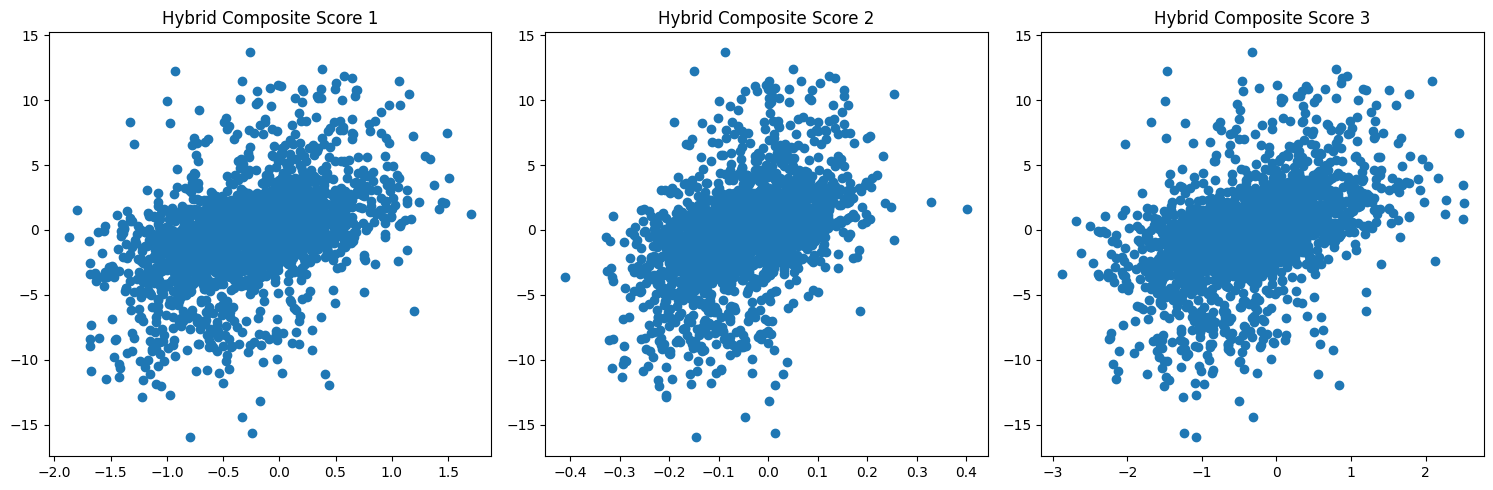

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))  
# First plot
result, output_df = calculate_spearman_coefficient(test, methods, 'Hybrid Composite Score 1', 'deltaG')
plt.subplot(1, 4, 1)  
plt.scatter(output_df['Hybrid Composite Score 1'] - output_df['Hybrid Composite Score 1_other'], output_df['deltaG'] - output_df['deltaG_other'])
plt.title('Hybrid Composite Score 1')
print(result)

# Second plot
result, output_df = calculate_spearman_coefficient(test, methods, 'Hybrid Composite Score 2', 'deltaG')
plt.subplot(1, 4, 2)  
plt.scatter(output_df['Hybrid Composite Score 2'] - output_df['Hybrid Composite Score 2_other'], output_df['deltaG'] - output_df['deltaG_other'])
plt.title('Hybrid Composite Score 2')
print(result)

# Third plot
result, output_df = calculate_spearman_coefficient(test, methods, 'Hybrid Composite Score 3', 'deltaG')
plt.subplot(1, 4, 3) 
plt.scatter(output_df['Hybrid Composite Score 3'] - output_df['Hybrid Composite Score 3_other'], output_df['deltaG'] - output_df['deltaG_other'])
plt.title('Hybrid Composite Score 3')
print(result)


plt.tight_layout()  
plt.show()  


In [31]:
import numpy as np
import matplotlib.pyplot as plt

num_groups = 1
bar_width = 0.08
index = np.arange(num_groups)

dd_s = [delta_G_s]
dd_s = np.abs(np.array(dd_s))

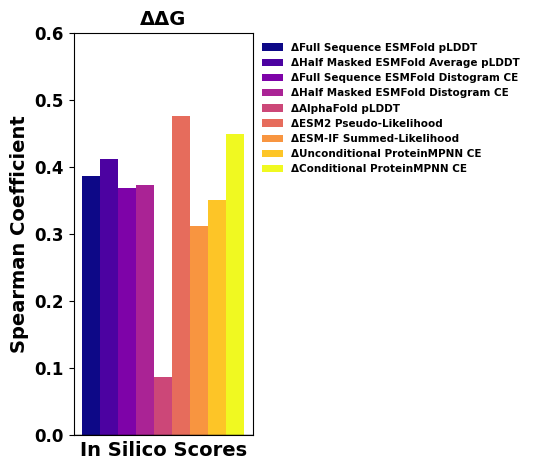

In [32]:


colors = plt.cm.plasma(np.linspace(0, 1, 9))


plt.bar(index - 5 * bar_width, dd_s[:, 0], bar_width, label='ΔFull Sequence ESMFold pLDDT', color =colors[0])
plt.bar(index - 4 * bar_width, dd_s[:, 1], bar_width, label='ΔHalf Masked ESMFold Average pLDDT', color =colors[1])
plt.bar(index -3*bar_width, data_s[:, 10], bar_width, label='ΔFull Sequence ESMFold Distogram CE', color =colors[2])
plt.bar(index - 2*bar_width, data_s[:, 13], bar_width, label='ΔHalf Masked ESMFold Distogram CE', color =colors[3])
plt.bar(index-bar_width, dd_s[:, 4], bar_width, label='ΔAlphaFold pLDDT', color =colors[4])
plt.bar(index, dd_s[:, 3], bar_width, label='ΔESM2 Pseudo-Likelihood', color =colors[5])
plt.bar(index+1*bar_width, dd_s[:, 15], bar_width, label='ΔESM-IF Summed-Likelihood', color =colors[6])
plt.bar(index+2*bar_width, dd_s[:, 6], bar_width, label='ΔUnconditional ProteinMPNN CE', color =colors[7])
plt.bar(index + 3*bar_width, dd_s[:, 7], bar_width, label='ΔConditional ProteinMPNN CE', color =colors[8])


plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.title('ΔΔG', fontsize=14, weight='bold')
plt.xlabel('In Silico Scores', fontsize=14, weight='bold')
plt.ylabel('Spearman Coefficient', fontsize=14, weight='bold')
plt.ylim([0, 0.6])  

plt.xticks([])  

plt.yticks(fontsize=12, weight='bold')
plt.yticks(np.arange(0, 0.65, 0.1), fontsize=12, weight='bold')  # Adjust the step as needed


legend = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=7.5, frameon=False)
for text in legend.get_texts():
    text.set_weight('bold')  

plt.tight_layout(rect=[0, 0, 0.85, 1])  
# plt.savefig('/home/jupyter-yehlin/DMSV2/final_paper_figures/models_delta_spearman_coefficient_plasma_logESM.png', dpi=300)
plt.show()

## final dG and ddG graph

/tmp/ipykernel_2128536/3629760851.py:110: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0, 0.6, 0.1), weight='bold')


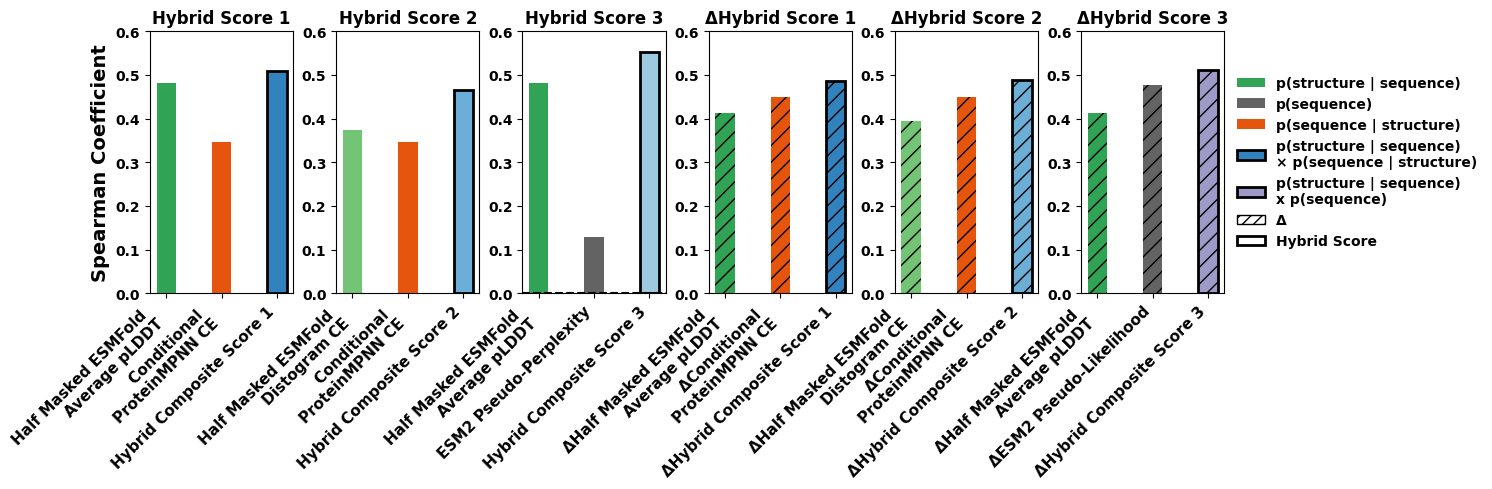

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter
from matplotlib.patches import Patch

colors = plt.cm.tab20c(np.linspace(0, 1, 20))

bar_width = 0.35  # Width of the bars
bar_positions = np.arange(3)

values_set1 = [data_s[:, 1][0], data_s[:, 7][0], data_s[:, 8][0]]
values_set2 = [data_s[:, 13][0], data_s[:, 7][0], data_s[:, 11][0]]
values_set3 = [data_s[:, 1][0], data_s[:, 3][0], data_s[:, 14][0]]

color_set1 =  colors[[8,4,0]]
color_set2 =  colors[[9,4,1]]
color_set3 = colors[[8,16,2]]

labels_set1 = ['Half Masked ESMFold \n Average pLDDT', 'Conditional \n ProteinMPNN CE', 'Hybrid Composite Score 1']
labels_set2 = ['Half Masked ESMFold \n Distogram CE', 'Conditional \n ProteinMPNN CE', 'Hybrid Composite Score 2']
labels_set3 = ['Half Masked ESMFold \n Average pLDDT', 'ESM2 Pseudo-Perplexity', 'Hybrid Composite Score 3']


fig, axes = plt.subplots(1, 6, figsize=(15, 5))
for pos, value, label, color in zip(bar_positions, values_set1, labels_set1, color_set1):
    if pos == 2:  
        axes[0].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2)
    else:
        axes[0].bar(pos, value, bar_width, label=label, color=color)

axes[0].set_xticks(bar_positions)
axes[0].set_xticklabels(labels_set1, rotation=45, ha="right", weight = 'bold',  fontsize= 11)
axes[0].set_ylabel('Spearman Coefficient', weight = 'bold', fontsize= 14)
axes[0].set_title('Hybrid Score 1', weight = 'bold')

for pos, value, label, color in zip(bar_positions, values_set2, labels_set2, color_set2):
    if pos == 2:  
        axes[1].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2)
    else:
        axes[1].bar(pos, value, bar_width, label=label, color=color)

axes[1].set_xticks(bar_positions)
axes[1].set_xticklabels(labels_set2, rotation=45, ha="right", weight = 'bold',  fontsize= 11)
axes[1].set_title('Hybrid Score 2', weight = 'bold')

# Mixing colors for the third set
for pos, value, label, color in zip(bar_positions, values_set3, labels_set3, color_set3):
    if pos == 2:  
        axes[2].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2)
    else:
        axes[2].bar(pos, value, bar_width, label=label, color=color)

axes[2].set_xticks(bar_positions)
axes[2].set_xticklabels(labels_set3, rotation=45, ha="right", weight = 'bold',  fontsize= 11)
axes[2].set_title('Hybrid Score 3', weight = 'bold')
axes[2].axhline(color='black', linestyle='--')

bar_width = 0.35  # Width of the bars


bar_positions = np.arange(3)


values_set1 = [dd_s[:, 1][0], dd_s[:, 7][0], dd_s[:, 8][0]]
values_set2 = [dd_s[:, 13][0], dd_s[:, 7][0], dd_s[:, 11][0]]
values_set3 = [dd_s[:, 1][0], dd_s[:, 3][0], dd_s[:, 14][0]]

color_set1 =  colors[[8,4,0]]
color_set2 =  colors[[9,4,1]]
color_set3 = colors[[8,16,13]]

labels_set1 = ['ΔHalf Masked ESMFold \n Average pLDDT', 'ΔConditional \n ProteinMPNN CE', 'ΔHybrid Composite Score 1']
labels_set2 = ['ΔHalf Masked ESMFold \n Distogram CE', 'ΔConditional \n ProteinMPNN CE', 'ΔHybrid Composite Score 2']
labels_set3 = ['ΔHalf Masked ESMFold \n Average pLDDT', 'ΔESM2 Pseudo-Likelihood', 'ΔHybrid Composite Score 3']


for pos, value, label, color in zip(bar_positions, values_set1, labels_set1, color_set1):
    if pos == 2: 
        axes[3].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2, hatch='//')
    else:
        axes[3].bar(pos, value, bar_width, label=label, color=color, hatch='//')

axes[3].set_xticks(bar_positions)
axes[3].set_xticklabels(labels_set1, rotation=45, ha="right", weight = 'bold', fontsize= 11)

axes[3].set_title('ΔHybrid Score 1', weight = 'bold')

for pos, value, label, color in zip(bar_positions, values_set2, labels_set2, color_set2):
    if pos == 2:  
        axes[4].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2, hatch='//')
    else:
        axes[4].bar(pos, value, bar_width, label=label, color=color, hatch='//')

axes[4].set_xticks(bar_positions)
axes[4].set_xticklabels(labels_set2, rotation=45, ha="right", weight = 'bold',  fontsize= 11)
axes[4].set_title('ΔHybrid Score 2', weight = 'bold')

for pos, value, label, color in zip(bar_positions, values_set3, labels_set3, color_set3):
    if pos == 2:  
        axes[5].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2, hatch='//')
    else:
        axes[5].bar(pos, value, bar_width, label=label, color=color, hatch='//')

axes[5].set_xticks(bar_positions)
axes[5].set_xticklabels(labels_set3, rotation=45, ha="right", weight = 'bold',  fontsize= 11)
axes[5].set_title('ΔHybrid Score 3', weight = 'bold')

for ax in axes:
    ax.set_ylim([0,0.6])
    ax.set_yticklabels(np.arange(0, 0.6, 0.1), weight='bold')
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))


color_set1 =  colors[[8,4,0]]
color_set2 =  colors[[9,4,1]]
color_set3 = colors[[8,16,2]]

labels_set1 = ['Half Masked ESMFold \n Average pLDDT', 'Conditional \n ProteinMPNN CE', 'Hybrid Composite Score 1']
labels_set2 = ['Half Masked ESMFold \n Distogram CE', 'Conditional \n ProteinMPNN CE', 'Hybrid Composite Score 2']
labels_set3 = ['Half Masked ESMFold \n Average pLDDT', 'ESM2 Pseudo-Likelihood', 'Hybrid Composite Score 3']


legend_elements = [Patch(facecolor=colors[8], label='p(structure | sequence)')]
legend_elements += [Patch(facecolor=colors[16], label='p(sequence)')]
legend_elements += [Patch(facecolor=colors[4], label='p(sequence | structure)')]
legend_elements += [Patch(facecolor=colors[0], edgecolor='black',linewidth=2,label='p(structure | sequence)\n× p(sequence | structure)')]
legend_elements += [Patch(facecolor=colors[13],edgecolor='black', linewidth=2,label='p(structure | sequence)\nx p(sequence)')]
legend_elements += [Patch(facecolor='none', edgecolor='black', hatch='///', label='Δ')]
legend_elements += [Patch(facecolor='none', edgecolor='black', linewidth=2, label='Hybrid Score')]
axes[5].legend(handles=legend_elements, frameon=False,loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14, prop={'weight':'bold'})

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)

# plt.savefig('/home/jupyter-yehlin/DMSV2/final_paper_figures/models_combined_figure3_3scores.png',  dpi=300)

plt.show()

/tmp/ipykernel_2128536/4202837880.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0.1, 0.6, 0.1), weight='bold')


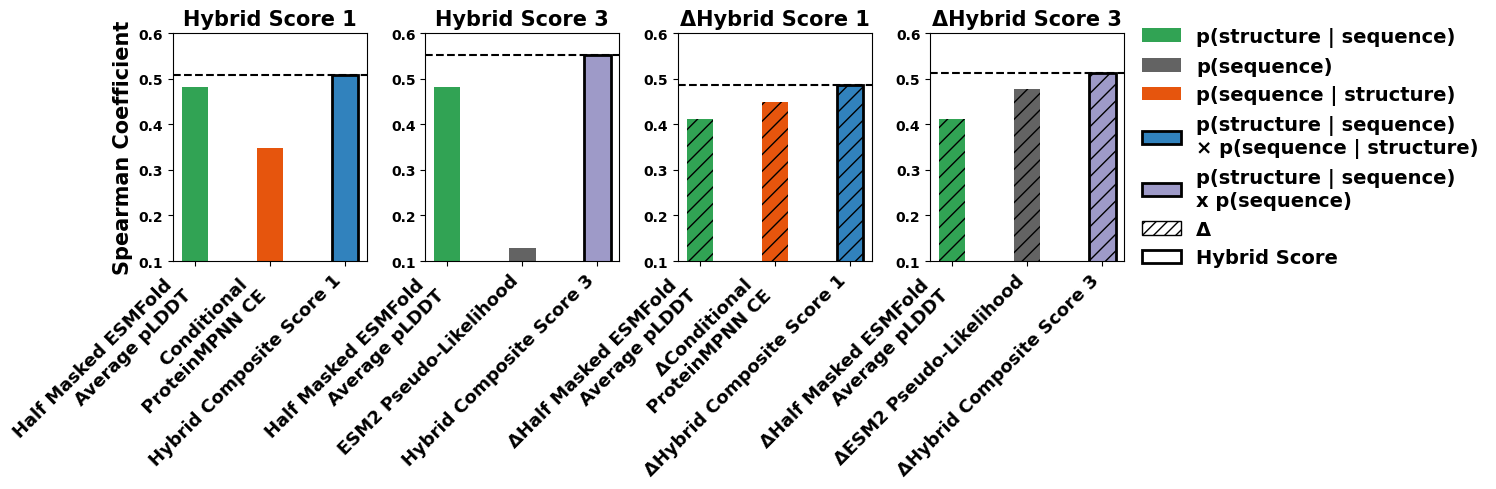

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter
from matplotlib.patches import Patch

colors = plt.cm.tab20c(np.linspace(0, 1, 20))

bar_width = 0.35 


bar_positions = np.arange(3)

values_set1 = [data_s[:, 1][0], data_s[:, 7][0], data_s[:, 8][0]]
values_set3 = [data_s[:, 1][0], data_s[:, 3][0], data_s[:, 14][0]]

color_set1 =  colors[[8,4,0]]
color_set3 = colors[[8,16,13]]

labels_set1 = ['Half Masked ESMFold \n Average pLDDT', 'Conditional \n ProteinMPNN CE', 'Hybrid Composite Score 1']
labels_set3 = ['Half Masked ESMFold \n Average pLDDT', 'ESM2 Pseudo-Likelihood', 'Hybrid Composite Score 3']

fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for pos, value, label, color in zip(bar_positions, values_set1, labels_set1, color_set1):
    if pos == 2:  
        axes[0].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2)
    else:
        axes[0].bar(pos, value, bar_width, label=label, color=color)

axes[0].set_xticks(bar_positions)
axes[0].set_xticklabels(labels_set1, rotation=45, ha="right", weight='bold', fontsize=13)
axes[0].set_ylabel('Spearman Coefficient', weight='bold', fontsize=15)
axes[0].set_title('Hybrid Score 1', weight='bold', fontsize=15)


max_value_set1 = max(values_set1)
axes[0].axhline(max_value_set1, color='black', linestyle='--')


for pos, value, label, color in zip(bar_positions, values_set3, labels_set3, color_set3):
    if pos == 2:  # Check if it's the third item
        axes[1].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2)
    else:
        axes[1].bar(pos, value, bar_width, label=label, color=color)

axes[1].set_xticks(bar_positions)
axes[1].set_xticklabels(labels_set3, rotation=45, ha="right", weight='bold', fontsize=13)
axes[1].set_title('Hybrid Score 3', weight='bold', fontsize=15)

max_value_set3 = max(values_set3)
axes[1].axhline(max_value_set3, color='black', linestyle='--')

values_set1 = [dd_s[:, 1][0], dd_s[:, 7][0], dd_s[:, 8][0]]
values_set3 = [dd_s[:, 1][0], dd_s[:, 3][0], dd_s[:, 14][0]]

color_set1 = colors[[8, 4, 0]]
color_set3 = colors[[8, 16, 13]]

labels_set1 = ['ΔHalf Masked ESMFold \n Average pLDDT', 'ΔConditional \n ProteinMPNN CE', 'ΔHybrid Composite Score 1']
labels_set3 = ['ΔHalf Masked ESMFold \n Average pLDDT', 'ΔESM2 Pseudo-Likelihood', 'ΔHybrid Composite Score 3']


for pos, value, label, color in zip(bar_positions, values_set1, labels_set1, color_set1):
    if pos == 2:  
        axes[2].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2, hatch='//')
    else:
        axes[2].bar(pos, value, bar_width, label=label, color=color, hatch='//')

axes[2].set_xticks(bar_positions)
axes[2].set_xticklabels(labels_set1, rotation=45, ha="right", weight='bold', fontsize=13)
axes[2].set_title('ΔHybrid Score 1', weight='bold', fontsize=15)

max_value_delta_set1 = max(values_set1)
axes[2].axhline(max_value_delta_set1, color='black', linestyle='--')

for pos, value, label, color in zip(bar_positions, values_set3, labels_set3, color_set3):
    if pos == 2:  
        axes[3].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2, hatch='//')
    else:
        axes[3].bar(pos, value, bar_width, label=label, color=color, hatch='//')

axes[3].set_xticks(bar_positions)
axes[3].set_xticklabels(labels_set3, rotation=45, ha="right", weight='bold', fontsize=13)
axes[3].set_title('ΔHybrid Score 3', weight='bold', fontsize=15)


max_value_delta_set3 = max(values_set3)
axes[3].axhline(max_value_delta_set3, color='black', linestyle='--')

for ax in axes:
    ax.set_ylim([0.1, 0.6])
    ax.set_yticklabels(np.arange(0.1, 0.6, 0.1), weight='bold')
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))

legend_elements = [
    Patch(facecolor=colors[8], label='p(structure | sequence)'),
    Patch(facecolor=colors[16], label='p(sequence)'),
    Patch(facecolor=colors[4], label='p(sequence | structure)'),
    Patch(facecolor=colors[0], edgecolor='black', linewidth=2, label='p(structure | sequence)\n× p(sequence | structure)'),
    Patch(facecolor=colors[13], edgecolor='black', linewidth=2, label='p(structure | sequence)\nx p(sequence)'),
    Patch(facecolor='none', edgecolor='black', hatch='///', label='Δ'),
    Patch(facecolor='none', edgecolor='black', linewidth=2, label='Hybrid Score')
]
axes[3].legend(handles=legend_elements, frameon=False, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15, prop={'weight': 'bold', "size": 14})

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)

# plt.savefig('/home/jupyter-yehlin/DMSV2/final_paper_figures/models_combined_figure3_2scores_logESM.png', dpi=300)

plt.show()

## 1-1 Comparision

In [35]:
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt


def scatter_and_correlation_color_experiment_datapoint(ax, df, x_column, y_column, label_x, label_y, color_column, xlim=None, ylim=None, colorbar=False, show_y_label= False):
    
    df_no_nan = df[[x_column, y_column, color_column]].dropna()

    sc = ax.scatter(df_no_nan[x_column].tolist(), df_no_nan[y_column].tolist(), c=df_no_nan[color_column], cmap='bwr', marker='o', alpha=0.7, s=5)

                                              
    ax.set_xlabel(label_x, fontsize=14, weight= 'bold')
    if show_y_label:
        ax.set_ylabel(label_y, fontsize=14, weight= 'bold')

    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)


    pearson_coefficient, _ = pearsonr(df_no_nan[x_column], df_no_nan[y_column])

    spearman_coefficient, _ = spearmanr(df_no_nan[x_column], df_no_nan[y_column])

    ax.text(0.5, 0.90, f"Spearman Coeff: {spearman_coefficient:.2f}", transform=ax.transAxes,
            horizontalalignment='center', verticalalignment='top', fontsize=14, weight= 'bold')
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

    if colorbar:
        cbar = plt.colorbar(sc, ax=ax, label='ΔG')

    return pearson_coefficient, spearman_coefficient

def plot_computation_vs_computation(ylabel ='log10_K50_t', ylabel_print_name = '', save_dir=''):
    
    fig, axs = plt.subplots(2, 6, figsize=(20, 7), dpi=200)
    axs = axs.flatten()

    p1,s1=scatter_and_correlation_color_experiment_datapoint(axs[0], merged_df, 'Half Masked ESMFold Average Plddt', ylabel, 'Half Masked \n ESMFold Average pLDDT', ylabel_print_name, 'deltaG', show_y_label=True)
    p2,s2=scatter_and_correlation_color_experiment_datapoint(axs[1], merged_df, 'CE_full', ylabel, 'Full Sequence \n ESMFold Distogram CE', ylabel_print_name, 'deltaG')
    p3,s3=scatter_and_correlation_color_experiment_datapoint(axs[2], merged_df, 'CE_avg_mask', ylabel, 'Half Masked \n ESMFold  Distogram CE', ylabel_print_name, 'deltaG')
    p5,s5=scatter_and_correlation_color_experiment_datapoint(axs[4], merged_df, 'AF_plddt', ylabel, 'AlphaFold pLDDT', ylabel_print_name, 'deltaG')
    p4,s4=scatter_and_correlation_color_experiment_datapoint(axs[3], merged_df, 'ESM Score', ylabel, 'ESM2 Pseudo-Likelihood', ylabel_print_name, 'deltaG')
    p12,s12=scatter_and_correlation_color_experiment_datapoint(axs[6], merged_df, 'dg_IF', ylabel, 'ESM-IF Summed Likelihood', ylabel_print_name, 'deltaG')
    p6,s6=scatter_and_correlation_color_experiment_datapoint(axs[5], merged_df, 'inter_pae',ylabel, 'AlphaFold Inter-PAE', ylabel_print_name, 'deltaG', show_y_label=True)
    p7,s7=scatter_and_correlation_color_experiment_datapoint(axs[7], merged_df, 'unconditional_CE', ylabel, 'Unconditional \n ProteinMPNN CE', ylabel_print_name, 'deltaG')
    p8,s8=scatter_and_correlation_color_experiment_datapoint(axs[8], merged_df, 'conditional_CE', ylabel, 'Conditional \n ProteinMPNN CE', ylabel_print_name, 'deltaG')
    p9,s9=scatter_and_correlation_color_experiment_datapoint(axs[9], merged_df, 'Hybrid Composite Score 1', ylabel, 'Hybrid Composite Score 1', ylabel_print_name, 'deltaG')
    p10,s10=scatter_and_correlation_color_experiment_datapoint(axs[10], merged_df, 'Hybrid Composite Score 2', ylabel, 'Hybrid Composite Score 2', ylabel_print_name, 'deltaG')
    p11,s11=scatter_and_correlation_color_experiment_datapoint(axs[11], merged_df, 'Hybrid Composite Score 3', ylabel, 'Hybrid Composite Score 3', ylabel_print_name, 'deltaG')

    plt.tight_layout()
    plt.savefig(save_dir, dpi=300)
    
    plt.show()


In [37]:
# plot_computation_vs_computation('Full Seq PLDDT', 'Full Sequence pLDDT', '/home/jupyter-yehlin/DMSV2/figures/final_bold_figures_with_esm_if/one_to_one_model_correlation_figure_2.png')